In [1]:
import numpy as np
import pandas as pd
import quandl
import matplotlib.pyplot as plt
import os

userinputs = []

The Quandl package is free to use for Python, but it is important to mention that if you are trying to use this program, you have to create a account to generate the API Key that allows you to get the stock information. Thanks, and happy coding!
Link to website where you create the aforementioned account: https://data.nasdaq.com/login

In [2]:
#creating a rudimentary GUI to help retrieve the api key using Tkinter
import tkinter as tk

frame = tk.Tk()
frame.title("Check for API")
frame.geometry('800x200')
lbl = tk.Label(frame, text = "Do you have a registered environmental variable for your Quandl API Key(Y/N): ")
lbl.pack()
inputtxt = tk.Text(frame, height = 5, width = 20)
inputtxt.pack()

def processKey():
    keysaved = inputtxt.get(1.0, "end-1c").strip()
    if (keysaved.lower() == "y"):
        frame.destroy()
        APIFrame = tk.Tk()
        APIFrame.title("Save Key")
        APIFrame.geometry("500x200")
        enterAPILabel = tk.Label(APIFrame, text = "Enter the Quandl API Key here:")
        enterAPILabel.pack()
        inputkey = tk.Text(APIFrame, height = 5, width = 20)
        inputkey.pack()
        apibutton = tk.Button(APIFrame, text = "Enter", command = lambda: destroyFrame(APIFrame))
        apibutton.pack()
        key = inputkey.get(1.0, "end-1c")
        inputKey = os.environ.get(key)
        if (inputKey == None):
            quandl.ApiConfig.api_key = key
            userinputs.append(key)
        else:
            userinputs.append(inputKey)
            
        APIFrame.mainloop()
        
        
    if (keysaved.lower() == "n"):
        frame.destroy()
        genFrame = tk.Tk()
        genFrame.title("Create Key")
        genFrame.geometry("500x200")
        genLabel = tk.Label(genFrame, text = "Enter the new environmental variable for your Quandl API key:")
        genLabel.pack()
        genInputKey = tk.Text(genFrame, height = 5, width = 20)
        genInputKey.pack()
        iKeyButton = tk.Button(genFrame, text = "Enter", command = lambda: destroyFrame(genFrame))
        iKeyButton.pack()
        inputKey = genInputKey.get(1.0, "end-1c")
        quandl.ApiConfig.api_key = inputKey
        userinputs.append(inputKey)
        genFrame.mainloop()
  

def inputStockYear():
    stockFrame = tk.Tk()
    stockFrame.title("Get Stock")
    stockFrame.geometry("500x200")
    stockLabel = tk.Label(stockFrame, text = "Enter the stock name you want:")
    stockLabel.pack()
    stockKey = tk.Text(stockFrame, height = 5, width = 20)
    stockKey.pack()
    
    stockButton = tk.Button(stockFrame, text = "Enter", command = lambda: read(stockLabel, stockKey, stockButton, stockFrame))
    stockButton.pack()
    stockFrame.mainloop()

def destroyFrame(frame):
    frame.destroy()
    inputStockYear()
        
# Button Creation
button = tk.Button(frame, text = "Enter", command = processKey)
button.pack()

def readYear(text, frame):
    numYears = int(text.get(1.0, "end-1c"))
    userinputs.append(numYears)
    frame.destroy()
    return numYears

def read(label, text, button, frame):
    name = text.get(1.0, "end-1c")
    if (validCode(name)):
        userinputs.append(name)
        label.config(text = "Enter the number of days in the future you want to predict.")
        button.configure(text= "Enter", command = lambda: readYear(text, frame))
    else:
        label.config(text = "That is invalid. Please retry.")
    
def validCode(name):
    try:
        data = quandl.get("WIKI/" + name)
        return True
    except:
        return False
    
frame.mainloop()

In [3]:
#now we use the inputs from userinputs as inputs for the model
key = userinputs[0]
stock = userinputs[1]
years = userinputs[2]


dataset = quandl.get("WIKI/" + stock)

In [4]:
dataset.drop('Adj. Close', 1)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Volume
Date,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.750,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.250,785200.0,0.0,1.0,0.402563,0.402563,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.250,472000.0,0.0,1.0,0.373010,0.373010,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.870,385900.0,0.0,1.0,0.380362,0.382273,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.630,327900.0,0.0,1.0,0.391536,0.393300,0.391536,18362400.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.040000,175.090000,171.260000,35247358.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.000000,172.680000,168.600000,41051076.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.390000,169.920000,164.940000,40248954.0


In [5]:
from sklearn.linear_model import LinearRegression

X = np.array(dataset.drop('Adj. Close', 1))
X_train = X[:-years]

y = np.array(dataset["Adj. Close"])
y_train = y[:-years]
y_train = y_train.reshape((y_train.shape[0],1))

lr = LinearRegression()
lr.fit(X_train, y_train)

forecast = np.array(dataset.drop('Adj. Close', 1).tail(years)) # serves as a sample space to test the fit model
forecast_pred = lr.predict(forecast)

In [6]:
import random
track_id = str(random.randrange(0, 1000))

def visualize_old_data(old_data, stock, track_id):
    fig = plt.figure(figsize=(10,6))
    plt.plot(old_data, linewidth = 2.0)
    plt.title(f"{stock} Past Data Visualization")
    plt.ylabel('Adjusted Close')
    plt.xlabel('Time Progressed')
    plt.savefig(f'graphs_saved/{stock}_old_{track_id}.png')
    
def visualize_future_data(new_data, stock, track_id):
    fig = plt.figure(figsize=(10,6))
    plt.plot(new_data, linewidth = 2.0)
    plt.plot(ylim=(np.amin(new_data), np.amax(new_data)), marker='x')
    plt.title(f"{stock} Future Data Visualization")
    plt.ylabel('Adjusted Close')
    plt.xlabel('Time Progressed')
    plt.savefig(f'graphs_saved/{stock}_fut_{track_id}.png')
    

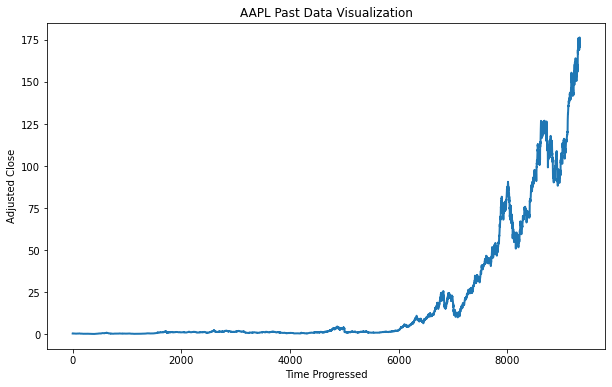

In [7]:
visualize_old_data(y_train, stock, track_id)

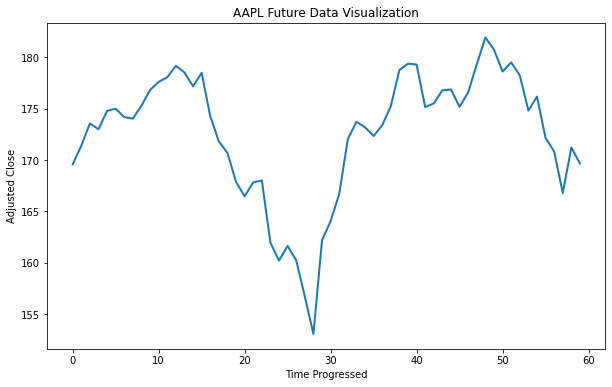

In [8]:
visualize_future_data(forecast_pred, stock, track_id)

In [9]:
#Wrapping this short project up, need to show these graphs on the TKINTER GUI, so that the user can see these
from PIL import Image, ImageTk

root = tk.Tk()
root.title('Stock Past and Future Data Visualization')
root.geometry('1500x800')

old_img = Image.open(f"graphs_saved/{stock}_old_{track_id}.png")
old_photo = ImageTk.PhotoImage(old_img)

fut_img = Image.open(f"graphs_saved/{stock}_fut_{track_id}.png")
fut_photo = ImageTk.PhotoImage(fut_img)

canvas = tk.Canvas(root, width = 1500, height = 500)
canvas.create_image(300,250,anchor = "center",image=old_photo)
canvas.create_image(1200,250,anchor = "center",image=fut_photo)
canvas.pack()

bio_label = tk.Label(root, text = f"On the left is a graphical statistic of the past days of data from {stock} \n and on the right is a series of predicted stats. \nQuandl API Key: {key}")
bio_label.pack()

bio_button = tk.Button(root, text = "Exit", command= lambda: root.destroy())
bio_button.pack()

root.mainloop()

###### 